In [1]:
!pip install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!pip uninstall opencv-python
!pip install opencv-contrib-python==3.4.2.16

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-r8zbiv31
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-r8zbiv31
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=0b3372a7f45fedacf58f9ffabd330b57a4f888d8bc7c66ccd7079383fd29577f
  Stored in directory: /tmp/pip-ephem-wheel-cache-hk72377b/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image  
from pnslib import utils

In [4]:
print(cv2.__version__)

3.4.2


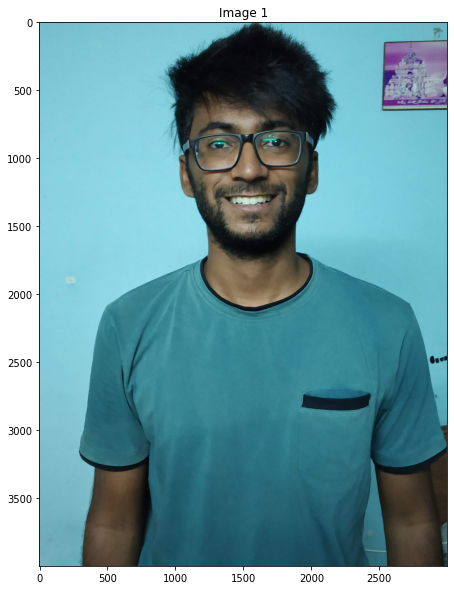

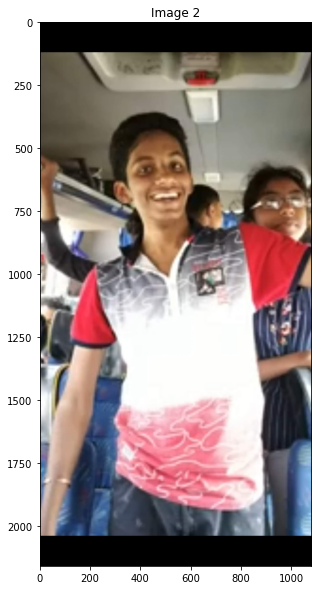

In [5]:
# Import the 2 images from gdrive
img1= cv2.imread('gdrive/My Drive/Facial recog/Images/tej1.jpg')
img2 = cv2.imread('gdrive/My Drive/Facial recog/Images/sid.jpg')

# img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# convert the images from bgr to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# print(img1_rgb.shape)

# show the images for reference
plt.figure(figsize=(20,10))
plt.imshow(img1)
plt.title('Image 1')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(img2)
plt.title('Image 2')
plt.show()

(4000, 3000)


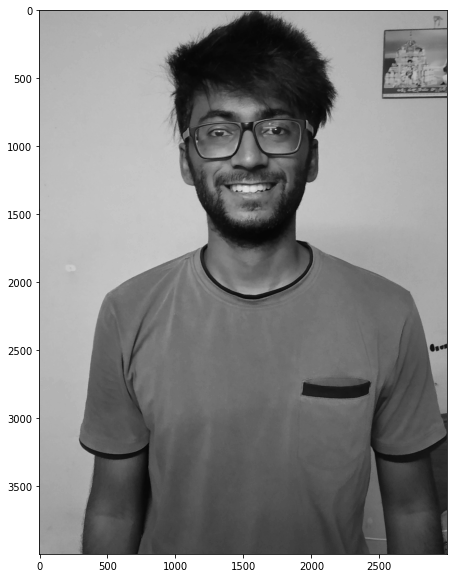

In [6]:
gray= cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
print(gray.shape)

plt.figure(figsize=(20,10))
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)
plt.show()

(4000, 3000, 3)


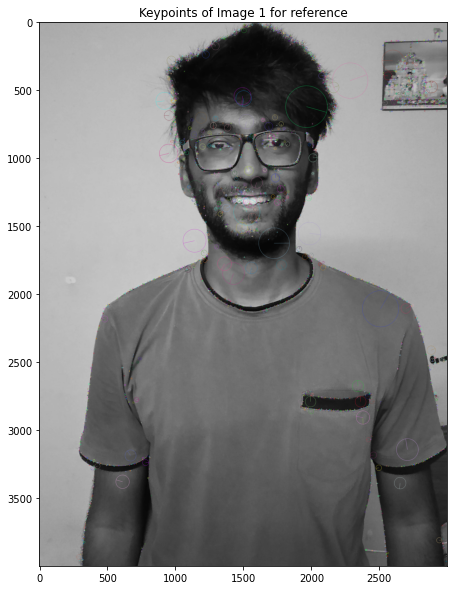

In [7]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

keypoints=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img1)

print(keypoints.shape)
plt.figure(figsize=(20,10))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()

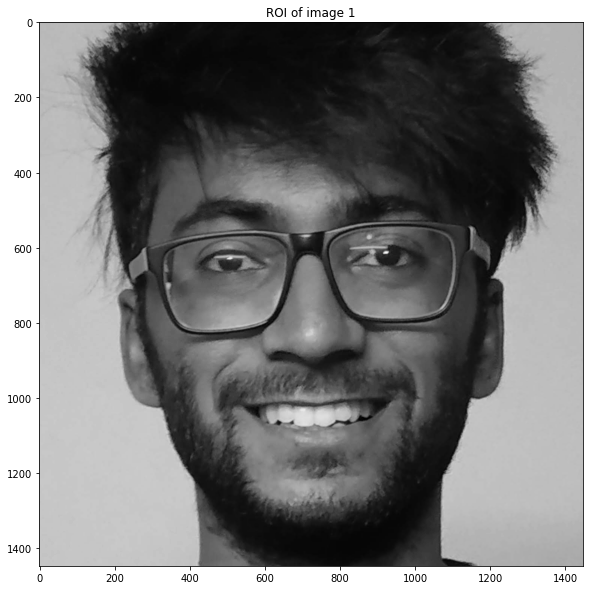

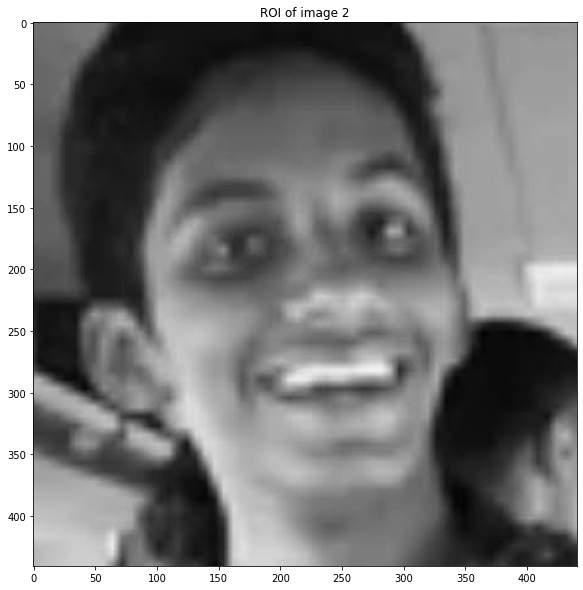

In [8]:
# for face detection
face_cascade = cv2.CascadeClassifier(utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))

# images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2= cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

gray=[gray1,gray2]

# detect faces in the 2 images
faces1 = face_cascade.detectMultiScale(gray1, 1.3, 5)
faces2 = face_cascade.detectMultiScale(gray2, 1.3, 5)
roi_gray=[]
roi_color=[]

size=gray1.shape

# crop out only the face of the first and second images
for (x,y,w,h) in faces1:

    extra=int(w/6)
    x1=max(0,x-extra)
    y1=max(0,y-extra)
    x2=min(size[1],x1+2*extra+w)
    y2=min(size[0],y1+2*extra+w)

    img1 = cv2.rectangle(img1,(x1,y1),(x2-1,y2-1),(0,0,255),4)
    roi_gray .append(gray1[y1:y2, x1:x2])
    roi_color .append(img1[y1:y2, x1:x2])

if len(faces1)==0:
  roi_gray .append(gray1)
  roi_color .append(img1)
    
size=gray2.shape
for (x,y,w,h) in faces2:

    extra=int(w/6)
    x1=max(0,x-extra)
    y1=max(0,y-extra)
    x2=min(size[1],x1+2*extra+w)
    y2=min(size[0],y1+2*extra+w)

    img2 = cv2.rectangle(img2,(x1,y1),(x2-1,y2-1),(0,0,255),4)
    roi_gray .append(gray2[y1:y2, x1:x2])
    roi_color .append(img2[y1:y2, x1:x2])

if len(faces2)==0:
  roi_gray .append(gray2)
  roi_color .append(img2)

# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# roi_color=cv2.cvtColor(roi_color,cv2.COLOR_BGR2RGB)

# plot the cropped out grayscale images of the originals
plt.figure(figsize=(20,10))
plt.imshow(roi_gray[0],cmap='gray', vmin=0, vmax=255)
plt.title('ROI of image 1')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(roi_gray[1],cmap='gray', vmin=0, vmax=255)
plt.title('ROI of image 2')
plt.show()

In [0]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(roi_gray[0],None)
kp2, des2 = sift.detectAndCompute(roi_gray[1],None)

In [0]:
# create a bruteforce matcher
bf = cv2.BFMatcher(
    # cv2.NORM_L2, 
    # crossCheck=True
    )

# Match descriptors.
# matches = bf.match(des1,des2)
matches=bf.knnMatch(des1,des2,k=2)

# Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)


In [11]:
len(matches[0])

2

In [0]:
# Apply ratio test to filter out only the good matches
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [13]:
print(len(matches))
print(len(good))

1352
23


Not a Match


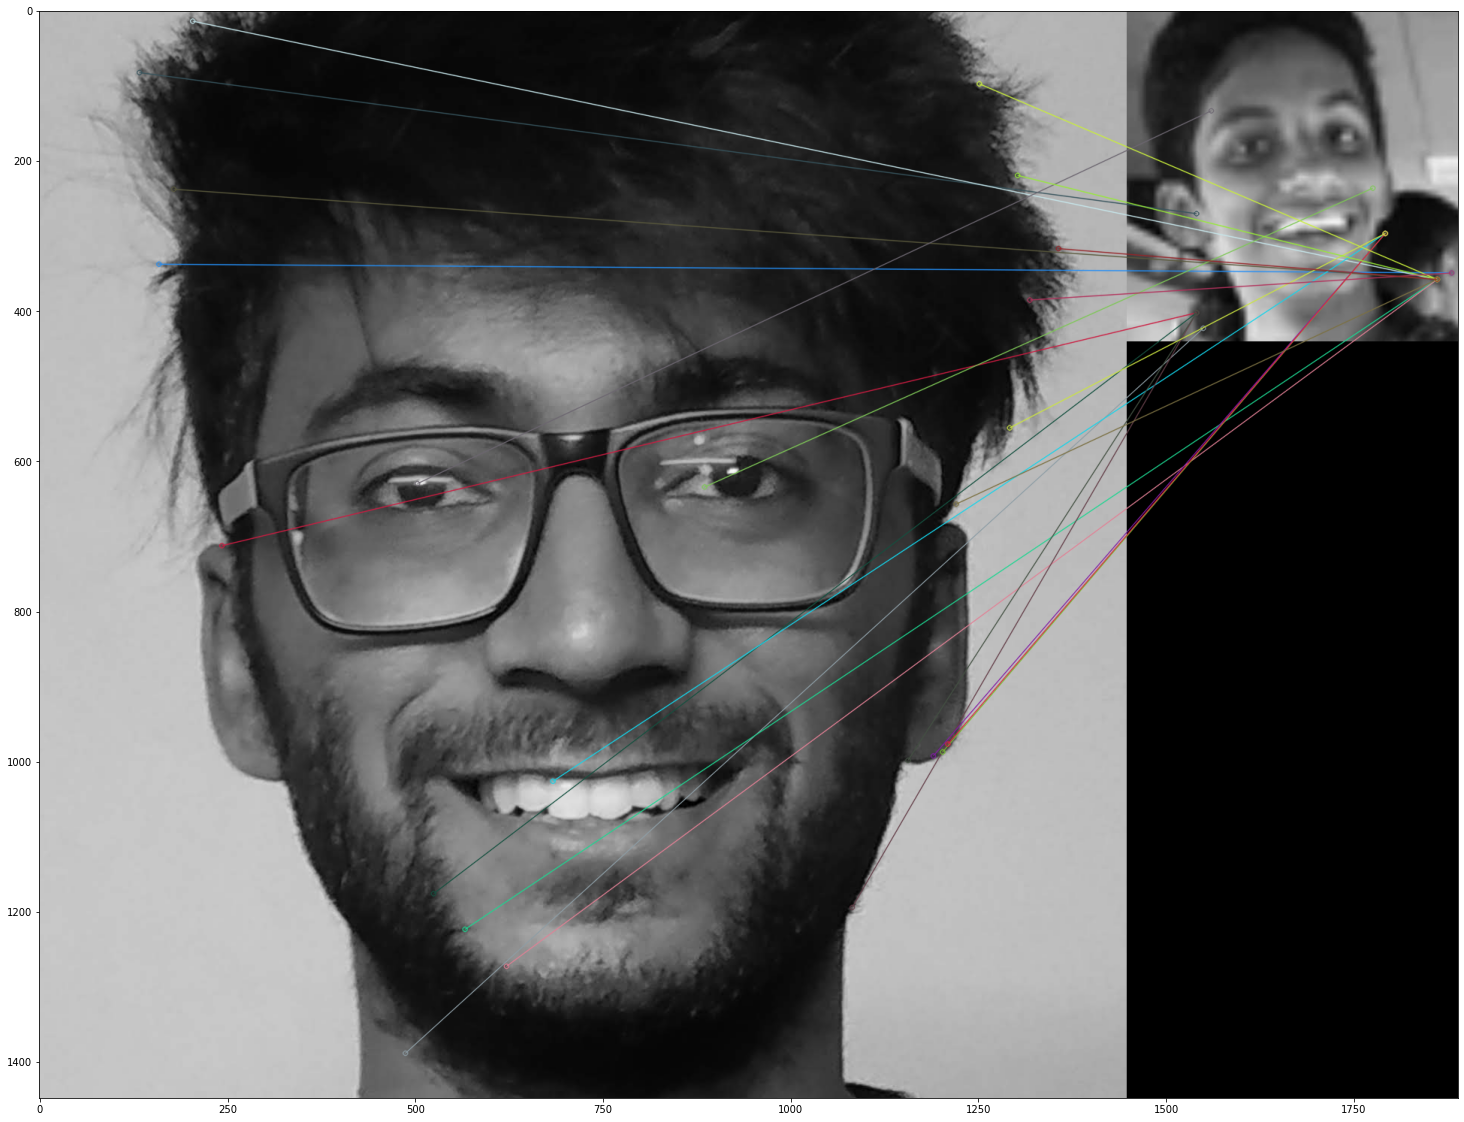

In [14]:
# Draw first 10 matches.
# img3=cv2.drawMatches(roi_gray[0],kp1,roi_gray[0],kp2,matches,None,flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(roi_gray[0],kp1,roi_gray[1],kp2,good,None,flags=2)

# decide whether the images are a match or not based on the number of good matches.
# Yes, crude but a good starting intuition
if len(good)>=45:
  print("It's a Match")

else:
  print("Not a Match")

plt.figure(figsize=(40,20))
plt.imshow(img3)
plt.show()